In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
DIR_CURRENT = '/content/gdrive/My Drive/thinkful/assignment/Module38 final capstone'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import tqdm
print(tqdm.__version__)
tqdm.tqdm.pandas() # use progress_apply to replace apply
from tqdm.notebook import tqdm

4.41.1


In [6]:
RANDOM_STATE = 2020

In [7]:
# df_app_dict_embedding = pd.read_pickle(DIR_CURRENT+ 'data/df_app_dict_embedding_0817.pkl')
# df_category_dict_embedding = pd.read_pickle(DIR_CURRENT+ 'data/df_category_dict_embedding_0817.pkl')                   
df_sequence_target = pd.read_pickle(DIR_CURRENT+ '/data/df_sequence_target_0817.pkl')              

In [8]:
df_sequence_target.head()

,device_id,seq_app,seq_label,seq_app_active,seq_label_active,gender,age,group,age_cate
0,-9222956879900151005,"[867, 241, 241, 120, 120, 120, 205, 205, 205, ...","[757, 549, 405, 704, 713, 548, 1007, 757, 959,...","[867, 120, 120, 120, 247, 247, 247, 247, 247, ...","[757, 704, 713, 548, 1007, 757, 959, 730, 779,...",M,36,M32-38,A32-40
1,-9221026417907250887,"[507, 482, 482, 482, 664, 664, 664, 417, 417, ...","[302, 720, 548, 549, 704, 713, 548, 1007, 221,...","[482, 482, 482, 482, 482, 482, 482, 965, 965, ...","[720, 548, 549, 704, 302, 302, 909, 223, 172, ...",F,31,F29-32,A29-31
2,-9220830859283101130,"[833, 779, 779, 779, 779, 779, 158, 158, 158, ...","[548, 549, 548, 710, 704, 172, 548, 721, 704, ...","[833, 158, 158, 158, 158, 158, 657, 657, 833, ...","[548, 548, 721, 704, 302, 302, 549, 548, 549, ...",M,19,M22-,A22-
3,-9220061629197656378,"[660, 29, 29, 29, 29, 29, 29, 29, 835, 835, 83...","[953, 177, 177, 704, 723, 714, 548, 549, 193, ...","[657, 657, 657, 657, 29, 29, 29, 29, 29, 29, 2...","[548, 549, 549, 548, 549, 548, 714, 723, 704, ...",M,40,M39+,A40+
4,-9218960997324667698,"[863, 950, 29, 29, 29, 29, 29, 29, 29, 86, 86,...","[1007, 548, 177, 177, 704, 723, 714, 548, 549,...","[863, 950, 29, 29, 29, 29, 29, 29, 29, 207, 20...","[1007, 548, 177, 177, 704, 723, 714, 548, 549,...",F,53,F43+,A40+


In [9]:
df_sequence_target.device_id.nunique()

23309

In [10]:
# re formulate the task. limit age_cate to 3 groups instead of the original 6
df_sequence_target.age_cate.value_counts()

A32-40    5175
A40+      4499
A23-26    3912
A29-31    3815
A22-      3267
A27-28    2641
Name: age_cate, dtype: int64

In [11]:
df_matching =pd.DataFrame({'age_cate':df_sequence_target.age_cate.unique()})
df_matching['age_cate_new'] = ['A32+', 'A27-31', 'A26-', 'A32+', 'A26-','A27-31']
df_matching

,age_cate,age_cate_new
0,A32-40,A32+
1,A29-31,A27-31
2,A22-,A26-
3,A40+,A32+
4,A23-26,A26-
5,A27-28,A27-31


In [12]:
df_sequence_target = pd.merge(df_sequence_target,df_matching,
                             on='age_cate')
df_sequence_target.head()

,device_id,seq_app,seq_label,seq_app_active,seq_label_active,gender,age,group,age_cate,age_cate_new
0,-9222956879900151005,"[867, 241, 241, 120, 120, 120, 205, 205, 205, ...","[757, 549, 405, 704, 713, 548, 1007, 757, 959,...","[867, 120, 120, 120, 247, 247, 247, 247, 247, ...","[757, 704, 713, 548, 1007, 757, 959, 730, 779,...",M,36,M32-38,A32-40,A32+
1,-9217193238265898015,"[779, 700, 700, 700, 700, 117, 326, 430, 430, ...","[549, 773, 780, 730, 262, 179, 166, 549, 548, ...","[430, 430, 430, 430, 430, 430, 430, 430, 430, ...","[549, 548, 721, 302, 302, 917, 910, 909, 927, ...",M,33,M32-38,A32-40,A32+
2,-9215766592714662253,"[779, 615, 424, 424, 424, 424, 424, 424, 424, ...","[549, 405, 215, 302, 302, 302, 704, 713, 714, ...","[779, 290, 290, 290, 290, 53, 53, 53, 614, 614...","[549, 704, 713, 548, 549, 704, 721, 548, 131, ...",F,34,F33-42,A32-40,A32+
3,-9214243372173201436,"[875, 540, 968, 968, 968, 968, 968, 773, 773, ...","[405, 549, 172, 704, 710, 548, 549, 549, 548, ...","[968, 968, 968, 968, 968, 626, 626, 626, 626, ...","[172, 704, 710, 548, 549, 549, 548, 713, 724, ...",F,34,F33-42,A32-40,A32+
4,-9212412905070443687,"[968, 701, 701, 701, 701, 340, 340, 340, 340, ...","[548, 158, 158, 152, 128, 266, 302, 302, 704, ...","[968, 105, 105, 105, 968, 486, 486, 486, 486, ...","[548, 549, 548, 713, 549, 1007, 730, 782, 777,...",M,33,M32-38,A32-40,A32+


In [13]:
# train-test split

In [14]:
from sklearn.model_selection import train_test_split
df_sequence_target_train, df_sequence_target_test = train_test_split(df_sequence_target, test_size=0.33, random_state=RANDOM_STATE)
print(len(df_sequence_target_train))
print(len(df_sequence_target_test))

15617
7692


In [15]:
# encode the target lable
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder().fit(df_sequence_target_train.gender)
le_age_cate = LabelEncoder().fit(df_sequence_target_train.age_cate_new)
print(le_gender.classes_)
print(le_age_cate.classes_)

['F' 'M']
['A26-' 'A27-31' 'A32+']


# let's try NLP-mimic deep learning using 'seq_app', with age_cate_new

In [16]:
# df_X = df_sequence_target_train[['seq_app']].sample(n=100, random_state = RANDOM_STATE)
# # X 
# y_lable = le_age_cate.transform(df_sequence_target_train[['age_cate_new']].sample(n=100, random_state = RANDOM_STATE))
# # y_lable

df_X = df_sequence_target_train[['seq_app']].copy()
# X 
y_lable = le_gender.transform(df_sequence_target_train[['gender']].values.ravel())
# y_lable

In [17]:
df_X_test = df_sequence_target_test[['seq_app']].copy()
# X 
y_lable_test = le_gender.transform(df_sequence_target_test[['gender']].values.ravel())

In [18]:
# del df_sequence_target_train
# del df_sequence_target_test
# del df_sequence_target

### four steps
- tokenization
- padding
- embedding
- embedding layer setups


In [19]:
# tokenization 

In [20]:
# def int_join(list): 
      
#     # Converting integer list to string list 
#     s = [str(i) for i in list] 
      
#     # Join list items using join() 
#     res = " ".join(s)
      
#     return(res) 

In [21]:
def int_join(list): 
    if not type(list) == int:
      # Converting integer list to string list 
      s = [str(i) for i in list] 
        
      # Join list items using join() 
      res = " ".join(s) 
      return(res) 
    else:
      return [str(list)]

In [22]:
df_X['seq_app_join'] = df_X.seq_app.apply(lambda x: int_join(x))
df_X.head()

,seq_app,seq_app_join
15539,"[867, 205, 205, 280, 280, 280, 280, 280, 280, ...",867 205 205 280 280 280 280 280 280 280 280 28...
13918,"[507, 891, 378, 843, 843, 843, 843, 843, 843, ...",507 891 378 843 843 843 843 843 843 843 843 71...
20317,"[507, 447, 447, 447, 447, 447, 447, 447, 769, ...",507 447 447 447 447 447 447 447 769 769 769 76...
22748,"[779, 692, 692, 692, 692, 692, 692, 692, 692, ...",779 692 692 692 692 692 692 692 692 713 713 71...
1744,"[59, 900, 317, 317, 59, 59, 59, 59, 137, 137, ...",59 900 317 317 59 59 59 59 137 137 137 137 137...


In [23]:
# drop columns to save ram
df_X.drop('seq_app', axis=1, inplace=True)
df_X.head()

,seq_app_join
15539,867 205 205 280 280 280 280 280 280 280 280 28...
13918,507 891 378 843 843 843 843 843 843 843 843 71...
20317,507 447 447 447 447 447 447 447 769 769 769 76...
22748,779 692 692 692 692 692 692 692 692 713 713 71...
1744,59 900 317 317 59 59 59 59 137 137 137 137 137...


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
raw_text = df_X.seq_app_join.values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(raw_text)
train_sequences = tokenizer.texts_to_sequences(raw_text) #Converting text to a vector of word indexes
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('1st token-id sequnce', train_sequences[0])

Found 999 unique tokens.
1st token-id sequnce [19, 91, 91, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 19, 19, 91, 19, 91, 91, 277, 277, 277, 277, 277, 277, 277, 277, 277, 277, 277, 91, 91, 91, 91, 91, 91, 91, 91, 91, 19, 19, 19, 14, 14, 14, 14, 14, 9, 9, 9, 9, 9, 9, 9, 9, 9, 53, 53, 2, 2, 2, 14, 14, 14, 14, 19, 19, 19, 19, 19, 19, 91, 19, 19, 466, 19, 14, 14, 14, 14, 14, 14, 14, 14, 14, 19, 2, 466, 466, 46, 46, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 46, 14, 46, 46, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 14, 14, 14, 53, 2, 2, 2, 2, 2, 91, 91, 277, 277, 277, 277, 277, 277, 277, 277, 277, 277, 277, 53, 9, 9, 9, 14, 14, 14, 14, 14, 14, 14, 14, 14, 466, 14, 14, 14, 14, 9, 9, 9, 9, 9, 9, 14, 2, 91, 15, 15, 15, 15, 9, 9, 9, 9, 9, 9, 9, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 9, 9, 53, 14, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 2, 2, 2, 2, 2, 53, 91, 14, 46, 466, 46, 

In [25]:
# word_index

In [26]:
df_X['token_sequence'] = df_X.seq_app_join.progress_apply(lambda x: tokenizer.texts_to_sequences([x])[0])
df_X.head()

100%|██████████| 15617/15617 [00:18<00:00, 844.00it/s]


,seq_app_join,token_sequence
15539,867 205 205 280 280 280 280 280 280 280 280 28...,"[19, 91, 91, 46, 46, 46, 46, 46, 46, 46, 46, 4..."
13918,507 891 378 843 843 843 843 843 843 843 843 71...,"[15, 12, 975, 125, 125, 125, 125, 125, 125, 12..."
20317,507 447 447 447 447 447 447 447 769 769 769 76...,"[15, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9,..."
22748,779 692 692 692 692 692 692 692 692 713 713 71...,"[3, 10, 10, 10, 10, 10, 10, 10, 10, 21, 21, 21..."
1744,59 900 317 317 59 59 59 59 137 137 137 137 137...,"[265, 736, 487, 487, 265, 265, 265, 265, 50, 5..."


In [27]:
# drop columns to save ram
df_X.drop('seq_app_join', axis=1, inplace=True)
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15617 entries, 15539 to 9056
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   token_sequence  15617 non-null  object
dtypes: object(1)
memory usage: 244.0+ KB


In [28]:
df_X.head()

,token_sequence
15539,"[19, 91, 91, 46, 46, 46, 46, 46, 46, 46, 46, 4..."
13918,"[15, 12, 975, 125, 125, 125, 125, 125, 125, 12..."
20317,"[15, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9,..."
22748,"[3, 10, 10, 10, 10, 10, 10, 10, 10, 21, 21, 21..."
1744,"[265, 736, 487, 487, 265, 265, 265, 265, 50, 5..."


# padding

In [29]:
df_X['count'] = df_X.token_sequence.apply(lambda x: len(x))

(array([1.5418e+04, 1.3900e+02, 3.4000e+01, 1.0000e+01, 4.0000e+00,
        1.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([2.000000e+00, 2.587240e+04, 5.174280e+04, 7.761320e+04,
        1.034836e+05, 1.293540e+05, 1.552244e+05, 1.810948e+05,
        2.069652e+05, 2.328356e+05, 2.587060e+05]),
 <a list of 10 Patch objects>)

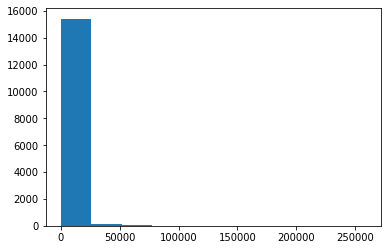

In [30]:
plt.hist(df_X['count'].values)

(0.0, 50000.0)

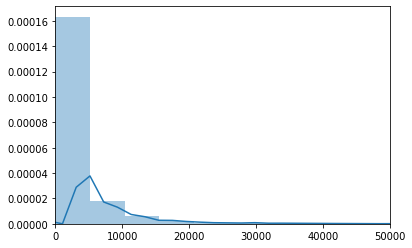

In [31]:
fig,ax = plt.subplots(1,1)
sns.distplot(df_X['count'].values, ax=ax)
ax.set_xlim([0,50000])


In [32]:
# pad with 10,000 should be fine

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
# type(df_X.loc[0].values[0])
# df_X.token_sequence.values[0]

In [35]:
# MAX_SEQUENCE_LENGTH = 5000 # length of the sequence
# trainvalid_data_pre = pad_sequences([df_X.token_sequence.values[0]], maxlen=MAX_SEQUENCE_LENGTH, 
#                                 padding='pre',
#                                 truncating='pre',)
# trainvalid_data_pre

In [36]:
MAX_SEQUENCE_LENGTH = 1000 # length of the sequence
df_X['padding'] = df_X.token_sequence.progress_apply(lambda x: \
                            pad_sequences([x], maxlen=MAX_SEQUENCE_LENGTH, 
                            padding='post',
                            truncating='post',)[0])
df_X.head()

100%|██████████| 15617/15617 [00:05<00:00, 3094.58it/s]


,token_sequence,count,padding
15539,"[19, 91, 91, 46, 46, 46, 46, 46, 46, 46, 46, 4...",3067,"[19, 91, 91, 46, 46, 46, 46, 46, 46, 46, 46, 4..."
13918,"[15, 12, 975, 125, 125, 125, 125, 125, 125, 12...",12264,"[15, 12, 975, 125, 125, 125, 125, 125, 125, 12..."
20317,"[15, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9,...",569,"[15, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9,..."
22748,"[3, 10, 10, 10, 10, 10, 10, 10, 10, 21, 21, 21...",613,"[3, 10, 10, 10, 10, 10, 10, 10, 10, 21, 21, 21..."
1744,"[265, 736, 487, 487, 265, 265, 265, 265, 50, 5...",223,"[265, 736, 487, 487, 265, 265, 265, 265, 50, 5..."


In [37]:
# drop columns to save ram
df_X.drop('token_sequence', axis=1, inplace=True)
df_X.head()

,count,padding
15539,3067,"[19, 91, 91, 46, 46, 46, 46, 46, 46, 46, 46, 4..."
13918,12264,"[15, 12, 975, 125, 125, 125, 125, 125, 125, 12..."
20317,569,"[15, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9,..."
22748,613,"[3, 10, 10, 10, 10, 10, 10, 10, 10, 21, 21, 21..."
1744,223,"[265, 736, 487, 487, 265, 265, 265, 265, 50, 5..."


In [38]:
# stop

# word embedding, use pre-trained model

In [39]:
df_app_dict_embedding = pd.read_pickle(DIR_CURRENT+ '/data/df_app_dict_embedding_0817.pkl')
# df_app_dict_embedding.app_id_encode = df_app_dict_embedding.app_id_encode.astype('object')
df_app_dict_embedding.head()

,app_id_encode,label_id_parse,word2vec
1,1,"[251, 259, 302, 1019]","[-1.3143959, 0.85598046, -0.008450016, 0.74776..."
2,2,"[251, 564, 562, 691]","[-0.58769, 0.58776534, 0.29039836, 0.041330658..."
3,3,[1007],"[-0.53830665, -0.02175867, -0.36475667, 0.2398..."
4,4,"[548, 714, 704, 179]","[-1.315475, 0.23229735, 0.43440366, 0.20839196..."
5,5,[1019],"[-0.49364, 0.1226805, -0.257535, -0.29191, 0.1..."


In [40]:
# df_app_dict_embedding[df_app_dict_embedding.app_id_encode==999]
# df_index_word_valid[df_index_word_valid.app_id_encode==999]

In [41]:
# MAX_NUM_TOKENS = 
# update token dictionary
df_index_word = pd.Series(tokenizer.index_word)
df_index_word_valid = pd.Series([0]).append(df_index_word).reset_index()
df_index_word_valid.columns = ['token_id', 'app_id_encode']
df_index_word_valid.app_id_encode = df_index_word_valid.app_id_encode.astype('int64')
# df_index_word_valid.head()
df_index_word_valid = pd.merge(left=df_index_word_valid,
#                                    right=df_app_dict_embedding[['app_id_encode','word2vec']],
                               right=df_app_dict_embedding,
                                   on='app_id_encode',
                                   how='left',
                              )
df_index_word_valid.at[0, "word2vec"] = np.zeros_like(df_index_word_valid.at[1, "word2vec"])
df_index_word_valid.head()

,token_id,app_id_encode,label_id_parse,word2vec
0,0,0,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,700,"[251, 405, 549, 548, 262, 756, 759, 786, 773, ...","[-3.796493, 2.728908, -0.06506435, -0.18458895..."
2,2,968,"[549, 548, 710, 704, 172, 724]","[-1.1412425, 1.2667327, -0.2593017, -0.692435,..."
3,3,779,"[549, 548, 710, 704, 172]","[-0.5510625, 0.9442594, -0.69520634, -0.791671..."
4,4,540,"[549, 548, 302, 1003, 128]","[-0.12061101, 0.696206, 0.28467, 0.33490533, 0..."


In [42]:
df_index_word_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   token_id        1000 non-null   int64 
 1   app_id_encode   1000 non-null   int64 
 2   label_id_parse  999 non-null    object
 3   word2vec        1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 79.1+ KB


In [43]:
# embedding matrix
embedding_matrix = np.array([vec for vec in tqdm(df_index_word_valid.word2vec.values)])

In [44]:
print(embedding_matrix.shape)

(1000, 300)


In [45]:
# stop

# tf embedding layer

In [46]:
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Embedding

In [47]:
MAX_NUM_TOKENS = embedding_matrix.shape[0]
EMBEDDING_DIM = embedding_matrix.shape[1]
# MAX_SEQUENCE_LENGTH = 10
embedding_layer = Embedding(input_dim=MAX_NUM_TOKENS,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            mask_zero=True,
                            trainable=False)

In [48]:
# trainable
MAX_NUM_TOKENS = embedding_matrix.shape[0]
EMBEDDING_DIM = embedding_matrix.shape[1]
# MAX_SEQUENCE_LENGTH = 10
embedding_layer_trainable = Embedding(input_dim=MAX_NUM_TOKENS,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            mask_zero=True,
                            trainable=True)

In [49]:
# input transform format
pad_sequences_train = np.array([sequence for sequence in tqdm(df_X.padding.values)])
pad_sequences_train[:2]

array([[ 19,  91,  91, ...,  14,  14,  14],
       [ 15,  12, 975, ..., 189, 406, 309]], dtype=int32)

In [50]:
# del df_X

In [51]:
# output shape
# should be in the shape [num_sequence, padded_sequence_length, embedding_vector_dim]

embedding_output = embedding_layer(pad_sequences_train[:10])
embedding_output.shape

TensorShape([10, 1000, 300])

# little test

In [52]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

In [53]:
# 1D CNN model.

cnnmodel = Sequential()
cnnmodel.add(embedding_layer)
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalAveragePooling1D())
# cnnmodel.add(Flatten())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(1, activation='sigmoid'))

cnnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 300)         300000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          192128    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 39, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 35, 128)           82048     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0

In [54]:
# # check gpu availability
# import tensorflow as tf
# tf.config.get_visible_devices(device_type=None)

In [55]:
# pad_sequences_train

In [56]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto',
    baseline=None, 
)

In [57]:
# with tf.device('/gpu:0'): # use cpu to train
# with tf.device('/gpu:0'): # use gpu to train
history_cnn = cnnmodel.fit(x=pad_sequences_train, y=y_lable,
              batch_size=128,
              validation_split=0.4,
              epochs=30,               
              callbacks=[callback])

Epoch 1/30
74/74 [==============================] - 6s 80ms/step - loss: 0.6825 - acc: 0.6282 - val_loss: 0.6278 - val_acc: 0.6621
Epoch 2/30
74/74 [==============================] - 6s 75ms/step - loss: 0.6369 - acc: 0.6433 - val_loss: 0.6172 - val_acc: 0.6674
Epoch 3/30
74/74 [==============================] - 6s 75ms/step - loss: 0.6247 - acc: 0.6567 - val_loss: 0.6047 - val_acc: 0.6880
Epoch 4/30
74/74 [==============================] - 6s 76ms/step - loss: 0.5993 - acc: 0.6796 - val_loss: 0.5765 - val_acc: 0.7074
Epoch 5/30
74/74 [==============================] - 6s 76ms/step - loss: 0.5754 - acc: 0.7037 - val_loss: 0.5585 - val_acc: 0.7240
Epoch 6/30
74/74 [==============================] - 6s 75ms/step - loss: 0.5707 - acc: 0.7070 - val_loss: 0.5552 - val_acc: 0.7272
Epoch 7/30
74/74 [==============================] - 6s 76ms/step - loss: 0.5636 - acc: 0.7216 - val_loss: 0.5560 - val_acc: 0.7259
Epoch 8/30
74/74 [==============================] - 6s 75ms/step - loss: 0.5489 - a

In [58]:
def NN_plot(history, epochs):
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  t = f.suptitle('Basic CNN Performance', fontsize=12)
  f.subplots_adjust(top=0.85, wspace=0.3)

  epoch_list = list(range(1,epochs+1))
  try:
      ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
      ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
  except:
      ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
      ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
  ax1.set_xticks(np.arange(0, epochs+1, 5))
  ax1.set_ylabel('Accuracy Value')
  ax1.set_xlabel('Epoch')
  ax1.set_title('Accuracy')
  l1 = ax1.legend(loc="best")

  ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
  ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
  ax2.set_xticks(np.arange(0, epochs+1, 5))
  ax2.set_ylabel('Loss Value')
  ax2.set_xlabel('Epoch')
  ax2.set_title('Loss')
  l2 = ax2.legend(loc="best")

In [ ]:
# Customer function # evaluation and visulization function
def model_evaluation(y_test, y_pred, y_pred_prob=None, ):
    
# input:
# y_pred: dataframe, in [0,1]
# y_pred_prob: dataframe, between (0,1)
# y_test: dataframe, in [0,1]
# example: model_evaluation(y_test_1, df_dumb_model.churn_yes, df_dumb_model.churn_prob ):


    y_pred_tmp = y_pred
    y_pred_prob = y_pred_prob
    y_test_tmp = y_test
    # is_print_classification_report = is_print_classification_report
    
        


# plot ROC curve and precision-recall curve in one plot
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    # ROC plot
    
    fpr, tpr, threshold = roc_curve(y_test_tmp, y_pred_prob)
    threshold[0]=1
    roc_auc = auc(fpr, tpr)

    ax[0].scatter(fpr, tpr, c='r', s=2, )
    ax[0].fill_between(fpr, tpr, step='post', alpha=0.1, color='r')

#         plt.scatter(fpr, tpr, c=threshold, cmap='tab10', s=1, label = 'ROC_AUC = %0.2f' % roc_auc)
    ax[0].plot([0, 1], [1, 1],'k--')   
    ax[0].plot([0, 1], [0, 1],'k--')
#     ax[0].legend(loc = 'lower right',)
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_title('Receiver operating characteristic: ROC_AUC = %0.2f' % roc_auc)
    ax[0].set_ylabel('TPR')
    ax[0].set_xlabel('FPR')

    # precision-recall curve   


    precision, recall, thresholds2 = precision_recall_curve(y_test_tmp, y_pred_prob)
    thresholds2 = np.append(thresholds2,1)
    pr_auc = auc(recall,precision)
    average_precision = average_precision_score(y_test_tmp,y_pred_prob)
#     average_precision = average_precision_score(y_test_tmp, y_pred_prob)

# plt.scatter(precision, recall, 'g', label = 'AP = %0.2f' % average_precision)
    ax[1].scatter(recall, precision, c='k', s=1, )
    ax[1].fill_between(recall, precision, step='post', alpha=0.1, color='k')

#         plt.scatter(precision, recall, c=thresholds2, cmap='tab10', s=1, label = 'PR_AUC = %0.2f' % pr_auc)
 
    ax[1].set_title('Precision-Recall curve: average precision = %0.2f' % average_precision)
#     ax[1].legend(loc = 'upper right',)
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_ylabel('Precision')
    ax[1].set_xlabel('Recall')
    ax[1].grid()
    #     plt.colorbar()
    plt.tight_layout()
    plt.show()   

In [ ]:
def plot_prediction_probability(y_test, y_pred, y_pred_prob=None):
    
    y_pred_tmp = y_pred
    y_pred_prob = y_pred_prob
    y_test_tmp = y_test   
    
    
    #     fig, ax = plt.subplots(1,2, figsize=(12,6))
    # Plot of Prediction Probabilities and the True Label
    df_scatterData = pd.DataFrame({'trueLabel':np.array(y_test).ravel(), 'proba': y_pred_prob})
    scatterDataMelted = pd.melt(df_scatterData, "trueLabel", \
                                var_name="proba")
    fig, ax = plt.subplots(2,1,figsize=(12,5), gridspec_kw={'height_ratios': [2,2]})
    sns.stripplot(x="value", y="proba", ax=ax[0],
                       hue='trueLabel', jitter=0.4, alpha=0.4,\
                  palette='Set2',
                       data=scatterDataMelted)
    ax[0].set_xlim([0,1])
    
    #     ax[0].set_xlabel(ax.get_xlabel(), fontsize=20)
    ax[0].set_xlabel("")
    ax[0].xaxis.set_tick_params(bottom=False, labelbottom=False,)
    #     ax[0].spines['bottom'].set_color('none')
    #
    ax[0].set_ylabel("")
    ax[0].yaxis.set_tick_params(left=False, labelleft=False,)
    ax[0]. legend(loc='upper right', frameon=True)
    ax[0].grid(axis='x')
    ax[0].set_title('Plot of prediction probabilities with true Labels', loc='left', fontsize=20,)
    
    sns.kdeplot(y_pred_prob, ax=ax[1], shade=True, color=sns.color_palette("Paired")[0],
    #                 alpha=0.2,
               label='prediction probability',)
    #     ax[1].add_legend()
   
    ax[1].set_ylabel("")
    ax[1].yaxis.set_tick_params(left=False, labelleft=False,)
    ax[1].set_xlim([0,1])
    ax[1].set_xlabel("")
#     ax[1].xaxis.set_tick_params(bottom=False, labelbottom=False,)
    ax[1].grid(axis='x')
    ax[1].legend(loc='upper right', frameon=True)
    ax[1].set_xlabel('Predicted probability', fontsize=15)

    ax[1].yaxis.set_tick_params(labelsize=12)
        
    plt.show()

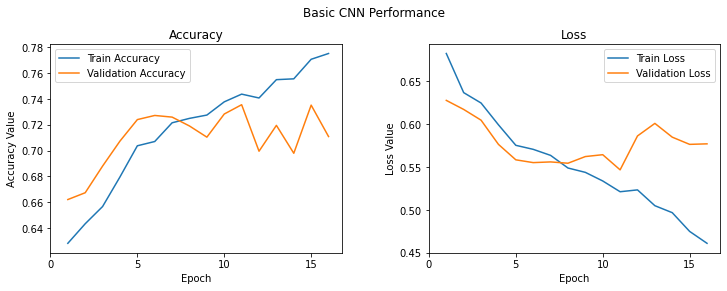

In [59]:
NN_plot(history_cnn, len(history_cnn.epoch))

In [60]:
# prepare the test sequence
# df_X_test
# y_lable_test

# tokenization
df_X_test['seq_app_join'] = df_X_test.seq_app.apply(lambda x: int_join(x))
df_X_test['token_sequence'] = df_X_test.seq_app_join.apply(lambda x: tokenizer.texts_to_sequences([x])[0])
# padding

df_X_test['padding'] = df_X_test.token_sequence.apply(lambda x: \
                            pad_sequences([x], maxlen=MAX_SEQUENCE_LENGTH, 
                            padding='post',
                            truncating='post',)[0])
pad_sequences_test = np.array([sequence for sequence in (df_X_test.padding.values)])

In [61]:
from sklearn.metrics import classification_report, roc_auc_score, log_loss

              precision    recall  f1-score   support

           0       0.58      0.57      0.57      2594
           1       0.78      0.79      0.78      5098

    accuracy                           0.71      7692
   macro avg       0.68      0.68      0.68      7692
weighted avg       0.71      0.71      0.71      7692

ROC_AUC:  0.7546268541369422
log_loss:  0.5702646862533467


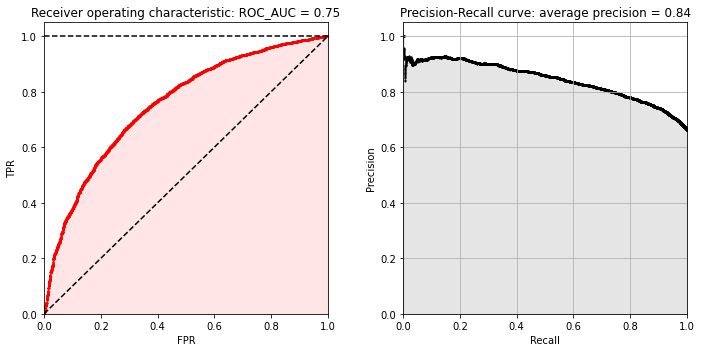

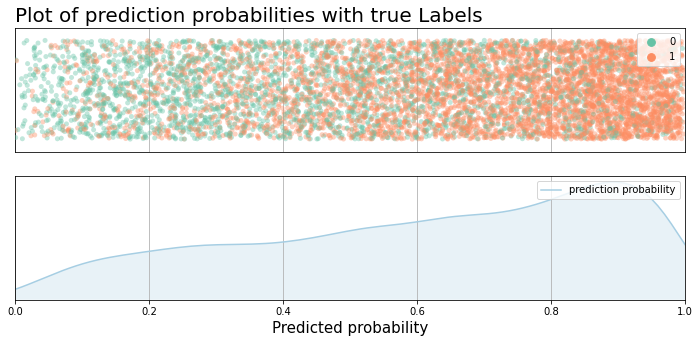

In [126]:
y_pred = cnnmodel.predict_classes(pad_sequences_test)
y_pred_prob = cnnmodel.predict(pad_sequences_test)
print(classification_report(y_true=y_lable_test, y_pred=y_pred))
print('ROC_AUC: ', roc_auc_score(y_true=y_lable_test, y_score=y_pred_prob))
print('log_loss: ', log_loss(y_true=y_lable_test, y_pred=y_pred_prob))
# visulization
model_evaluation(y_test=y_lable_test, y_pred=y_pred, y_pred_prob=y_pred_prob)
plot_prediction_probability(y_test=y_lable_test, y_pred=pd.DataFrame({'pred_yes':y_pred.ravel()}), y_pred_prob=y_pred_prob.ravel())

In [63]:
# stop here

In [64]:
# 1D CNN model. with trainable

In [65]:
cnnmodel_2 = Sequential()
cnnmodel_2.add(embedding_layer_trainable)
cnnmodel_2.add(Conv1D(128, 5, activation='relu'))
cnnmodel_2.add(MaxPooling1D(5))
cnnmodel_2.add(Conv1D(128, 5, activation='relu'))
cnnmodel_2.add(MaxPooling1D(5))
cnnmodel_2.add(Conv1D(128, 5, activation='relu'))
cnnmodel_2.add(GlobalAveragePooling1D())
# cnnmodel.add(Flatten())
cnnmodel_2.add(Dense(128, activation='relu'))
cnnmodel_2.add(Dense(1, activation='sigmoid'))

cnnmodel_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
cnnmodel_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 300)         300000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 996, 128)          192128    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 39, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 35, 128)           82048     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)              

In [66]:
# with tf.device('/gpu:0'): # use cpu to train
# with tf.device('/gpu:0'): # use gpu to train
history_cnn2 = cnnmodel_2.fit(x=pad_sequences_train, y=y_lable,
              batch_size=128,
              validation_split=0.4,
              epochs=30, 
              callbacks=[callback])

Epoch 1/30
74/74 [==============================] - 9s 122ms/step - loss: 0.6780 - acc: 0.6369 - val_loss: 0.6172 - val_acc: 0.6710
Epoch 2/30
74/74 [==============================] - 9s 119ms/step - loss: 0.6185 - acc: 0.6689 - val_loss: 0.5927 - val_acc: 0.7093
Epoch 3/30
74/74 [==============================] - 9s 118ms/step - loss: 0.5773 - acc: 0.7086 - val_loss: 0.5409 - val_acc: 0.7301
Epoch 4/30
74/74 [==============================] - 9s 118ms/step - loss: 0.5326 - acc: 0.7366 - val_loss: 0.5292 - val_acc: 0.7464
Epoch 5/30
74/74 [==============================] - 9s 119ms/step - loss: 0.5170 - acc: 0.7552 - val_loss: 0.5155 - val_acc: 0.7525
Epoch 6/30
74/74 [==============================] - 9s 118ms/step - loss: 0.4976 - acc: 0.7622 - val_loss: 0.5120 - val_acc: 0.7520
Epoch 7/30
74/74 [==============================] - 9s 118ms/step - loss: 0.4814 - acc: 0.7780 - val_loss: 0.5117 - val_acc: 0.7552
Epoch 8/30
74/74 [==============================] - 9s 119ms/step - loss: 0.

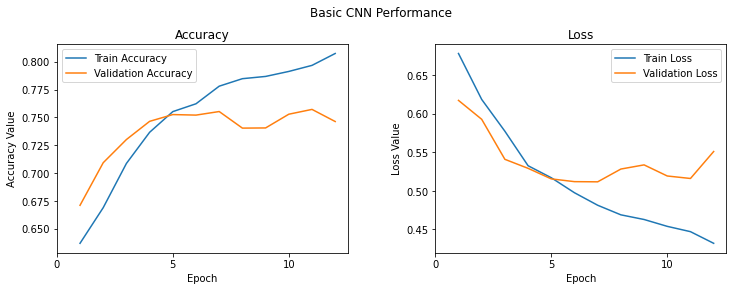

In [67]:
NN_plot(history_cnn2, len(history_cnn2.epoch))

              precision    recall  f1-score   support

           0       0.72      0.38      0.50      2594
           1       0.74      0.93      0.83      5098

    accuracy                           0.74      7692
   macro avg       0.73      0.65      0.66      7692
weighted avg       0.74      0.74      0.71      7692

ROC_AUC:  0.7689336801315648
log_loss:  0.5995648113857754


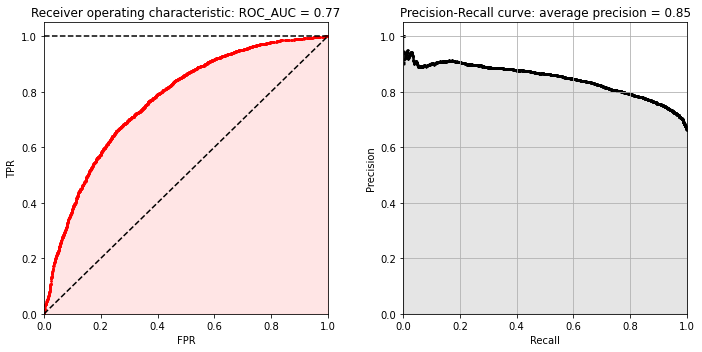

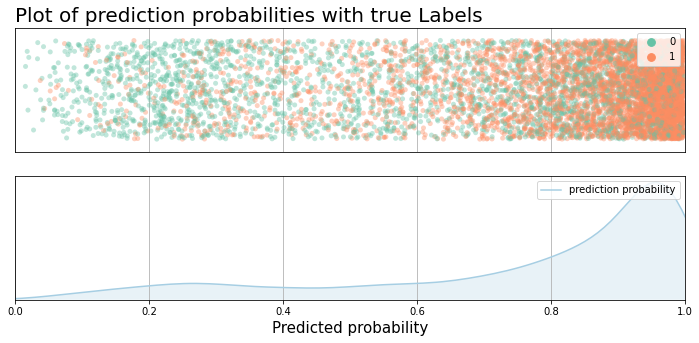

In [127]:
y_pred = cnnmodel_2.predict_classes(pad_sequences_test)
y_pred_prob = cnnmodel_2.predict(pad_sequences_test)
print(classification_report(y_true=y_lable_test, y_pred=y_pred))
print('ROC_AUC: ', roc_auc_score(y_true=y_lable_test, y_score=y_pred_prob))
print('log_loss: ', log_loss(y_true=y_lable_test, y_pred=y_pred_prob))
# visulization
model_evaluation(y_test=y_lable_test, y_pred=y_pred, y_pred_prob=y_pred_prob)
plot_prediction_probability(y_test=y_lable_test, y_pred=pd.DataFrame({'pred_yes':y_pred.ravel()}), y_pred_prob=y_pred_prob.ravel())

In [69]:
# stop here

In [70]:
### LSTM Model using pre-trained Embedding Layer

In [71]:
# note
# The requirements to use the cuDNN implementation are:

# activation == tanh
# recurrent_activation == sigmoid
# recurrent_dropout == 0
# unroll is False
# use_bias is True
# Inputs, if use masking, are strictly right-padded.
# Eager execution is enabled in the outermost context.

In [72]:
# LSTM model

rnnmodel = Sequential()
rnnmodel.add(embedding_layer)
rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0))
rnnmodel.add(Dense(1, activation='sigmoid'))
rnnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
rnnmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 300)         300000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 519,777
Trainable params: 219,777
Non-trainable params: 300,000
_________________________________________________________________


In [73]:
# with tf.device('/gpu:0'):
history_rnn = rnnmodel.fit(x=pad_sequences_train, y=y_lable,
                 batch_size=128,
                 validation_split=0.4,
                 epochs=30, 
                 callbacks=[callback])

Epoch 1/30
74/74 [==============================] - 13s 180ms/step - loss: 0.6549 - acc: 0.6402 - val_loss: 0.6299 - val_acc: 0.6630
Epoch 2/30
74/74 [==============================] - 12s 163ms/step - loss: 0.6330 - acc: 0.6551 - val_loss: 0.6184 - val_acc: 0.6698
Epoch 3/30
74/74 [==============================] - 12s 163ms/step - loss: 0.6157 - acc: 0.6800 - val_loss: 0.5893 - val_acc: 0.7088
Epoch 4/30
74/74 [==============================] - 12s 162ms/step - loss: 0.5917 - acc: 0.6987 - val_loss: 0.5670 - val_acc: 0.7127
Epoch 5/30
74/74 [==============================] - 12s 162ms/step - loss: 0.5806 - acc: 0.7016 - val_loss: 0.5648 - val_acc: 0.7235
Epoch 6/30
74/74 [==============================] - 12s 162ms/step - loss: 0.5733 - acc: 0.7116 - val_loss: 0.5729 - val_acc: 0.7179
Epoch 7/30
74/74 [==============================] - 12s 162ms/step - loss: 0.5602 - acc: 0.7244 - val_loss: 0.5599 - val_acc: 0.7162
Epoch 8/30
74/74 [==============================] - 12s 163ms/step - 

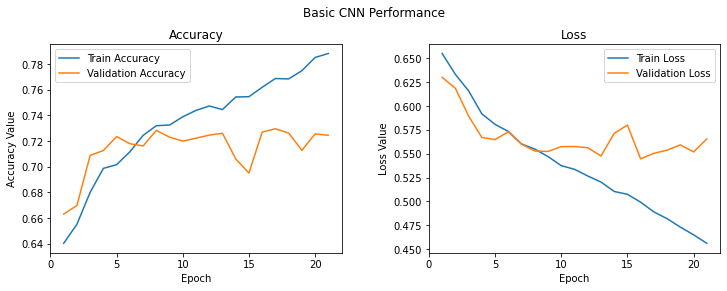

In [74]:
NN_plot(history_rnn, len(history_rnn.epoch))

              precision    recall  f1-score   support

           0       0.64      0.47      0.54      2594
           1       0.76      0.86      0.81      5098

    accuracy                           0.73      7692
   macro avg       0.70      0.67      0.68      7692
weighted avg       0.72      0.73      0.72      7692

ROC_AUC:  0.7569303184189727
log_loss:  0.559093088769677


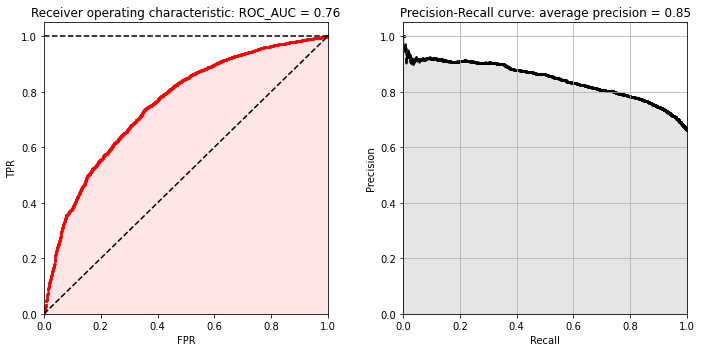

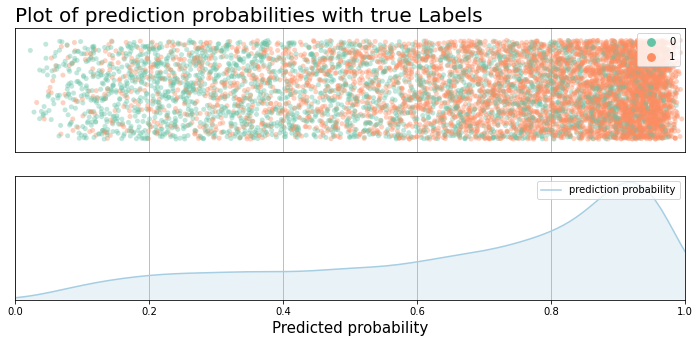

In [125]:
y_pred = rnnmodel.predict_classes(pad_sequences_test)
y_pred_prob = rnnmodel.predict(pad_sequences_test)
print(classification_report(y_true=y_lable_test, y_pred=y_pred))
print('ROC_AUC: ', roc_auc_score(y_true=y_lable_test, y_score=y_pred_prob))
print('log_loss: ', log_loss(y_true=y_lable_test, y_pred=y_pred_prob))
# visulization
model_evaluation(y_test=y_lable_test, y_pred=y_pred, y_pred_prob=y_pred_prob)
plot_prediction_probability(y_test=y_lable_test, y_pred=pd.DataFrame({'pred_yes':y_pred.ravel()}), y_pred_prob=y_pred_prob.ravel())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

In [76]:
# trainable

In [77]:
# LSTM model with trainable embedding
rnnmodel_2 = Sequential()
rnnmodel_2.add(embedding_layer_trainable)
rnnmodel_2.add(LSTM(128, dropout=0.2, recurrent_dropout=0))
rnnmodel_2.add(Dense(1, activation='sigmoid'))
rnnmodel_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
rnnmodel_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 300)         300000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 519,777
Trainable params: 519,777
Non-trainable params: 0
_________________________________________________________________


In [78]:
history_rnn2 = rnnmodel_2.fit(x=pad_sequences_train, y=y_lable,
              batch_size=128,
              validation_split=0.4,
              epochs=30, 
              callbacks=[callback])

Epoch 1/30
74/74 [==============================] - 16s 218ms/step - loss: 0.6092 - acc: 0.6765 - val_loss: 0.6216 - val_acc: 0.6715
Epoch 2/30
74/74 [==============================] - 15s 201ms/step - loss: 0.5377 - acc: 0.7394 - val_loss: 0.5521 - val_acc: 0.7404
Epoch 3/30
74/74 [==============================] - 15s 201ms/step - loss: 0.5086 - acc: 0.7613 - val_loss: 0.5273 - val_acc: 0.7519
Epoch 4/30
74/74 [==============================] - 15s 202ms/step - loss: 0.4847 - acc: 0.7800 - val_loss: 0.5303 - val_acc: 0.7541
Epoch 5/30
74/74 [==============================] - 15s 201ms/step - loss: 0.4810 - acc: 0.7858 - val_loss: 0.5223 - val_acc: 0.7546
Epoch 6/30
74/74 [==============================] - 15s 201ms/step - loss: 0.4629 - acc: 0.7930 - val_loss: 0.5206 - val_acc: 0.7508
Epoch 7/30
74/74 [==============================] - 15s 204ms/step - loss: 0.4613 - acc: 0.7934 - val_loss: 0.5330 - val_acc: 0.7461
Epoch 8/30
74/74 [==============================] - 15s 204ms/step - 

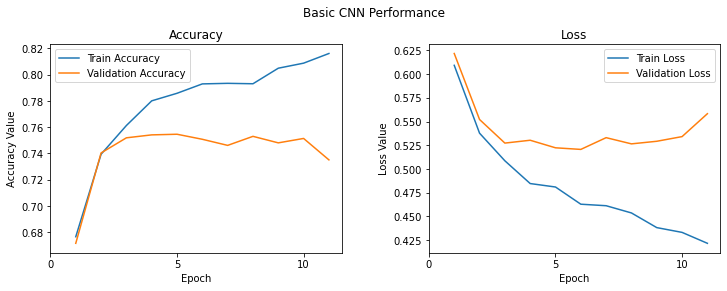

In [79]:
NN_plot(history_rnn2, len(history_rnn2.epoch))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      2594
           1       0.81      0.79      0.80      5098

    accuracy                           0.73      7692
   macro avg       0.70      0.71      0.71      7692
weighted avg       0.74      0.73      0.74      7692

ROC_AUC:  0.7812520700666323
log_loss:  0.5588893486545007


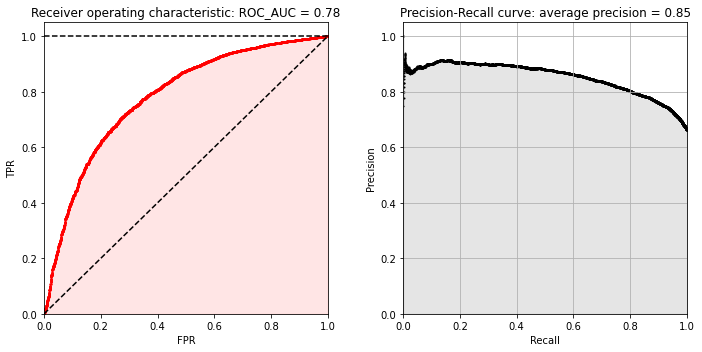

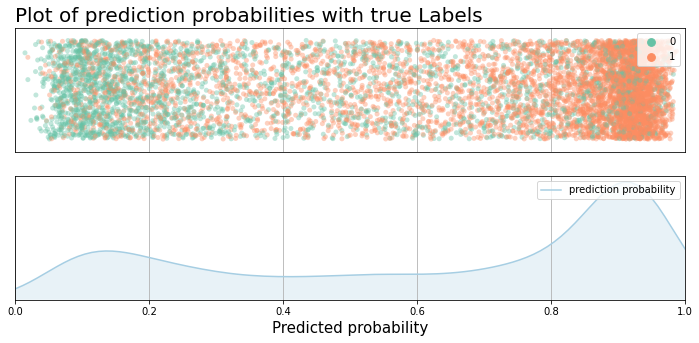

In [124]:
y_pred = rnnmodel_2.predict_classes(pad_sequences_test)
y_pred_prob = rnnmodel_2.predict(pad_sequences_test)
print(classification_report(y_true=y_lable_test, y_pred=y_pred))
print('ROC_AUC: ', roc_auc_score(y_true=y_lable_test, y_score=y_pred_prob))
print('log_loss: ', log_loss(y_true=y_lable_test, y_pred=y_pred_prob))
# visulization
model_evaluation(y_test=y_lable_test, y_pred=y_pred, y_pred_prob=y_pred_prob)
plot_prediction_probability(y_test=y_lable_test, y_pred=pd.DataFrame({'pred_yes':y_pred.ravel()}), y_pred_prob=y_pred_prob.ravel())

In [81]:
# just a fun test, what if we use multi-classes=2, softmax

In [82]:
# LSTM model with trainable embedding
rnnmodel_3 = Sequential()
rnnmodel_3.add(embedding_layer_trainable)
rnnmodel_3.add(LSTM(128, dropout=0.2, recurrent_dropout=0))
rnnmodel_3.add(Dense(2, activation='softmax'))
rnnmodel_3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
rnnmodel_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 300)         300000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 519,906
Trainable params: 519,906
Non-trainable params: 0
_________________________________________________________________


In [83]:
history_rnn3 = rnnmodel_3.fit(x=pad_sequences_train, y=y_lable,
              batch_size=128,
              validation_split=0.4,
              epochs=30, 
              callbacks=[callback])

Epoch 1/30
74/74 [==============================] - 16s 217ms/step - loss: 0.6180 - acc: 0.6672 - val_loss: 0.5638 - val_acc: 0.7160
Epoch 2/30
74/74 [==============================] - 15s 200ms/step - loss: 0.5144 - acc: 0.7581 - val_loss: 0.5438 - val_acc: 0.7436
Epoch 3/30
74/74 [==============================] - 15s 201ms/step - loss: 0.4836 - acc: 0.7816 - val_loss: 0.5335 - val_acc: 0.7501
Epoch 4/30
74/74 [==============================] - 15s 204ms/step - loss: 0.4670 - acc: 0.7928 - val_loss: 0.5324 - val_acc: 0.7492
Epoch 5/30
74/74 [==============================] - 15s 204ms/step - loss: 0.4634 - acc: 0.7920 - val_loss: 0.5436 - val_acc: 0.7372
Epoch 6/30
74/74 [==============================] - 15s 204ms/step - loss: 0.4493 - acc: 0.7987 - val_loss: 0.5422 - val_acc: 0.7573
Epoch 7/30
74/74 [==============================] - 15s 204ms/step - loss: 0.4281 - acc: 0.8164 - val_loss: 0.5365 - val_acc: 0.7524
Epoch 8/30
74/74 [==============================] - 15s 204ms/step - 

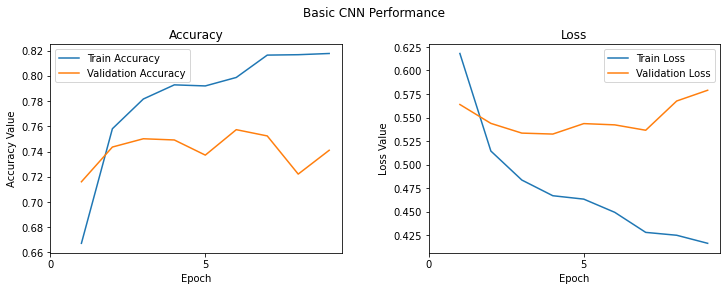

In [84]:
NN_plot(history_rnn3, len(history_rnn3.epoch))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62      2594
           1       0.82      0.77      0.79      5098

    accuracy                           0.73      7692
   macro avg       0.70      0.71      0.71      7692
weighted avg       0.74      0.73      0.74      7692

ROC_AUC:  0.7761266228944304
log_loss:  0.5847864769107614


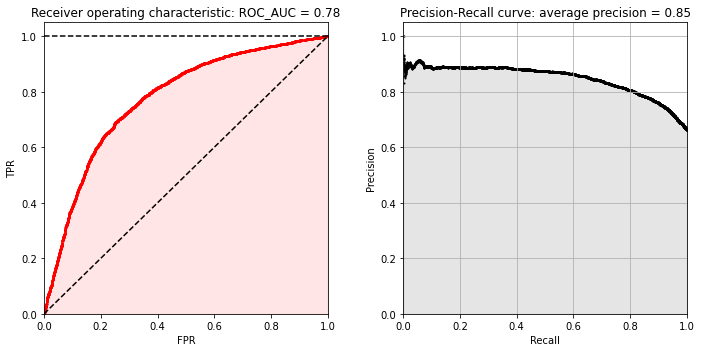

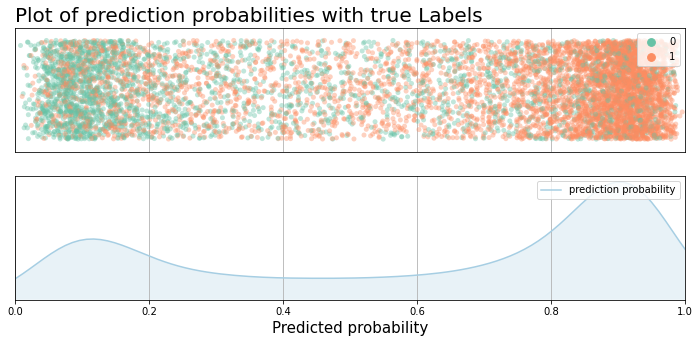

In [132]:
y_pred = rnnmodel_3.predict_classes(pad_sequences_test)
y_pred_prob = rnnmodel_3.predict(pad_sequences_test)
print(classification_report(y_true=y_lable_test, y_pred=y_pred))
print('ROC_AUC: ', roc_auc_score(y_true=y_lable_test, y_score=y_pred_prob[:,1]))
print('log_loss: ', log_loss(y_true=y_lable_test, y_pred=y_pred_prob[:,1]))
# visulization
model_evaluation(y_test=y_lable_test, y_pred=y_pred, y_pred_prob=y_pred_prob[:,1])
plot_prediction_probability(y_test=y_lable_test, y_pred=pd.DataFrame({'pred_yes':y_pred.ravel()}), y_pred_prob=y_pred_prob[:,1].ravel())

In [86]:
# last but not least, let's try different embedding layer structure with random initialization

In [87]:
embedding_layer_mini = Embedding(input_dim=MAX_NUM_TOKENS,
                            output_dim=96,
                            embeddings_initializer=None,
                            input_length=MAX_SEQUENCE_LENGTH,
                            mask_zero=True,
                            trainable=True)
rnnmodel_4 = Sequential()
rnnmodel_4.add(embedding_layer_mini)
rnnmodel_4.add(LSTM(128, dropout=0.2, recurrent_dropout=0))
rnnmodel_4.add(Dense(1, activation='sigmoid'))
rnnmodel_4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
rnnmodel_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 96)          96000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               115200    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 211,329
Trainable params: 211,329
Non-trainable params: 0
_________________________________________________________________


In [88]:
history_rnn4 = rnnmodel_4.fit(x=pad_sequences_train, y=y_lable,
              batch_size=128,
              validation_split=0.4,
              epochs=30, 
              callbacks=[callback])

Epoch 1/30
74/74 [==============================] - 10s 138ms/step - loss: 0.6483 - acc: 0.6442 - val_loss: 0.6036 - val_acc: 0.6750
Epoch 2/30
74/74 [==============================] - 9s 122ms/step - loss: 0.6065 - acc: 0.6774 - val_loss: 0.6363 - val_acc: 0.6642
Epoch 3/30
74/74 [==============================] - 9s 125ms/step - loss: 0.6247 - acc: 0.6527 - val_loss: 0.6193 - val_acc: 0.6666
Epoch 4/30
74/74 [==============================] - 9s 123ms/step - loss: 0.6001 - acc: 0.6729 - val_loss: 0.5841 - val_acc: 0.6951
Epoch 5/30
74/74 [==============================] - 9s 122ms/step - loss: 0.5488 - acc: 0.7328 - val_loss: 0.5608 - val_acc: 0.7296
Epoch 6/30
74/74 [==============================] - 9s 123ms/step - loss: 0.5413 - acc: 0.7449 - val_loss: 0.5626 - val_acc: 0.7272
Epoch 7/30
74/74 [==============================] - 9s 122ms/step - loss: 0.5511 - acc: 0.7247 - val_loss: 0.5763 - val_acc: 0.7059
Epoch 8/30
74/74 [==============================] - 9s 124ms/step - loss: 0

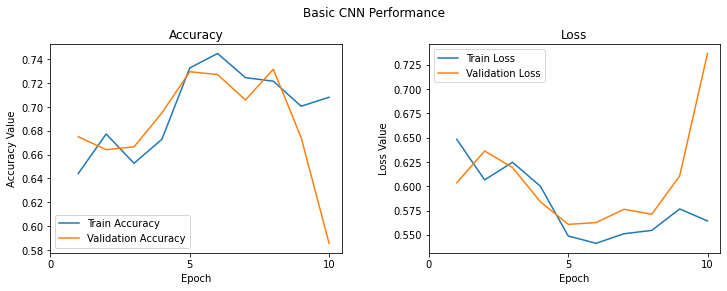

In [89]:
NN_plot(history_rnn4, len(history_rnn4.epoch))

In [90]:
y_pred = rnnmodel_4.predict_classes(pad_sequences_test)
y_pred_prob = rnnmodel_4.predict(pad_sequences_test)
print(classification_report(y_true=y_lable_test, y_pred=y_pred))
print('ROC_AUC: ', roc_auc_score(y_true=y_lable_test, y_score=y_pred_prob))
print('log_loss: ', log_loss(y_true=y_lable_test, y_pred=y_pred_prob))

              precision    recall  f1-score   support

           0       0.44      0.79      0.57      2594
           1       0.82      0.49      0.61      5098

    accuracy                           0.59      7692
   macro avg       0.63      0.64      0.59      7692
weighted avg       0.69      0.59      0.60      7692

ROC_AUC:  0.6954458231613347
log_loss:  0.7340628530125962


In [91]:
# post training analysis

In [92]:
# what kinda of data make the performance bad
# can we have a confidence indicator?

In [93]:
df_X_test['log_count'] = df_X_test.token_sequence.apply(lambda x: len(x))
df_X_test['y_lable_test'] = y_lable_test
df_X_test['y_pred_prob'] = rnnmodel_2.predict(pad_sequences_test)
df_X_test['log_loss_rnnmodel_2'] = df_X_test.apply(lambda x: log_loss(y_true=[x.y_lable_test], y_pred=[x.y_pred_prob], labels=[0,1]), axis=1)
df_X_test.head()

,seq_app,seq_app_join,token_sequence,padding,log_count,y_lable_test,y_pred_prob,log_loss_rnnmodel_2
12641,"[700, 700, 700, 649, 649, 649, 649, 649, 649, ...",700 700 700 649 649 649 649 649 649 700 649 64...,"[1, 1, 1, 55, 55, 55, 55, 55, 55, 1, 55, 55, 5...","[1, 1, 1, 55, 55, 55, 55, 55, 55, 1, 55, 55, 5...",2446,0,0.109808,0.116318
15385,"[515, 491, 491, 491, 491, 491, 491, 491, 491, ...",515 491 491 491 491 491 491 491 491 491 491 13...,"[123, 183, 183, 183, 183, 183, 183, 183, 183, ...","[123, 183, 183, 183, 183, 183, 183, 183, 183, ...",221,1,0.846719,0.166387
11898,"[507, 507, 507, 507, 910, 700, 700, 769, 769, ...",507 507 507 507 910 700 700 769 769 769 769 76...,"[15, 15, 15, 15, 625, 1, 1, 9, 9, 9, 9, 9, 9, ...","[15, 15, 15, 15, 625, 1, 1, 9, 9, 9, 9, 9, 9, ...",376,0,0.112228,0.119040
10136,"[779, 176, 176, 176, 560, 560, 560, 560, 560, ...",779 176 176 176 560 560 560 560 560 560 560 54...,"[3, 416, 416, 416, 120, 120, 120, 120, 120, 12...","[3, 416, 416, 416, 120, 120, 120, 120, 120, 12...",25,0,0.222853,0.252126
22988,"[155, 140, 484, 484, 484, 484, 484, 484, 484, ...",155 140 484 484 484 484 484 484 484 484 484 48...,"[714, 252, 154, 154, 154, 154, 154, 154, 154, ...","[714, 252, 154, 154, 154, 154, 154, 154, 154, ...",5620,1,0.956453,0.044524


(0.0, 50000.0)

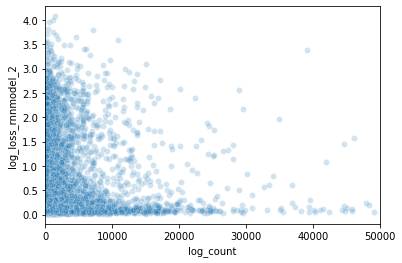

In [94]:

fig,ax = plt.subplots(1,1)
sns.scatterplot(df_X_test.log_count, df_X_test.log_loss_rnnmodel_2, alpha=0.2)
ax.set_xlim([0,50000])

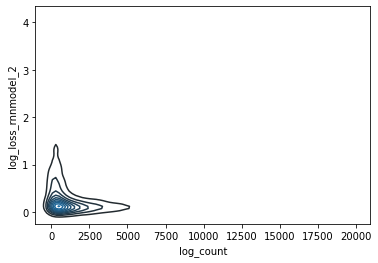

In [95]:

fig,ax = plt.subplots(1,1)
df_X_test_plot = df_X_test[df_X_test.log_count<20000]
sns.kdeplot(df_X_test_plot.log_count, df_X_test_plot.log_loss_rnnmodel_2, )
# ax.set_xlim([0,50000])